lambda_1 = 2.14
lambda_2 = 5.809
lambda_3 = 11.125


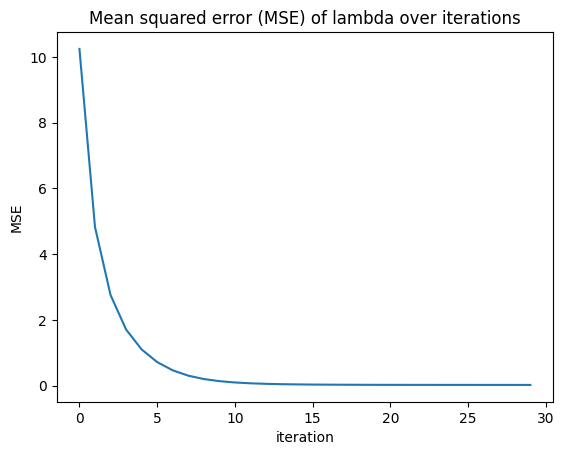

In [159]:
# Jacob L. Fine
# April 10th, 2024
# Implementing the Expectation-Maximization algorithm from scratch to resolve a mixture of three Poissons

import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# sets random seed
random.seed(2000127)

# initializes the parameters, i.e., number of component distributions and number of total samples
num_samples = 3000
num_clusters = 3

lambdas_true = [2,6,11]
# generates the ground truth component distributions from Poisson such that number of samples is divided into three and means are given 
data1 = np.random.poisson(int(lambdas_true[0]), size=(num_samples // 3,))  # Mean = 3
data2 = np.random.poisson(int(lambdas_true[1]), size=(num_samples // 3,))  # Mean = 5
data3 = np.random.poisson(int(lambdas_true[2]), size=(num_samples // 3,))  # Mean = 7

# concatenate the lists vertically, such that first 1000 entries are from mean 3, next from mean 5, and last mean 7
data = np.concatenate((data1, data2, data3)).reshape(-1, 1)

# generate a first guess (completely random) of the lambdas
lambdas = np.array(np.random.rand(num_clusters))

# implementing the EM algorithm

def E_step():
# the likelihood of each datapoint being from each cluster, based on current estimates of lambda and data
# uses the classic expression of possion, exp(-lambda)*lambda^x, but no factorial in denominator, since it will
# cancel out in the posterior, so no need to compute it
    likelihoods = np.exp(-lambdas) * np.power(lambdas, data) 
# now, obtains the posterior probability of observing a particular datapoint in a given cluster, based on the current estimates of lambda
    posteriors = likelihoods / likelihoods.sum(axis=1)[:, np.newaxis]
    return posteriors

def M_step():
# obtains the current posteriors from the E step
    posteriors = E_step()

# sums the posterior for each col, should be about num_samples/3
    sum_posteriors = np.sum(posteriors, axis=0)
    
# compute a weighted sum of each datapoint based on its probability, as a way to get the mean
    weighted_sum = np.sum(posteriors * data, axis=0)
    
# uses the maximum likelihood estimate for the lambda vector, which is simply the sample mean, to update it.
    lambdas = weighted_sum / sum_posteriors
    return lambdas

# sets the number of iterations
num_iterations = 30


# keeps track of the MSE for estimated values vs ground truth
MSE_dict = {}

# computes the EM algorithm for that many iterations
for _ in range(num_iterations):
    lambdas = M_step()
    lambdas = np.array(sorted(lambdas))
    MSE = sum((lambdas - lambdas_true)**2)/len(lambdas)
    MSE_dict[_] = MSE


# prints the final estimates of lambda
print(f'lambda_1 = {round(lambdas[0],3)}')
print(f'lambda_2 = {round(lambdas[1],3)}')
print(f'lambda_3 = {round(lambdas[2],3)}')

# obtains the current iterations and MSE
iterations = list(MSE_dict.keys())
MSEs = list(MSE_dict.values())

# makes a df of it for plotting
MSE_data = {'iteration': iterations, 'MSE': MSEs}
df_MSE = pd.DataFrame(MSE_data)

# Plot using Seaborn
sns.lineplot(x='iteration', y='MSE', data=df_MSE)
plt.title('Mean squared error (MSE) of lambda over iterations')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()


